### Import Dependencies

In [6]:
import numpy as np 
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Read Dataset

In [7]:
data = pd.read_csv('../data.csv')
data.drop('Index', axis=1, inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,459,460,461,462,463,464,465,466,467,label
0,0.156041,0.034724,0.071444,0.078117,0.0,0.043656,0.147673,0.290654,0.227140,0.271585,...,0.063550,0.104668,0.057380,0.062866,0.189442,0.170856,0.159821,0.323322,0.348375,0
1,0.099105,0.033467,0.048210,0.096153,0.0,0.050459,0.181863,0.332776,0.276899,0.323902,...,0.061139,0.101462,0.051161,0.050882,0.230257,0.214284,0.201468,0.353529,0.377521,0
2,0.160259,0.033538,0.105772,0.086060,0.0,0.046421,0.181095,0.224147,0.273403,0.312137,...,0.071666,0.147298,0.067166,0.087085,0.274896,0.251641,0.229446,0.382837,0.408696,0
3,0.139705,0.035719,0.060722,0.098022,0.0,0.051891,0.187796,0.330197,0.296981,0.350095,...,0.063510,0.106100,0.055346,0.057549,0.232088,0.215398,0.203230,0.354787,0.383226,0
4,0.144930,0.030739,0.065995,0.082237,0.0,0.041594,0.145923,0.312308,0.210267,0.247076,...,0.035856,0.051338,0.042271,0.047047,0.154600,0.146428,0.139789,0.194182,0.204608,0


### Split variables

In [8]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Training

In [9]:
model = LogisticRegression(C=100, penalty='l2', solver='newton-cg')
model.fit(x_train, y_train)

LogisticRegression(C=100, solver='newton-cg')

In [10]:
pred = model.predict(x_test)
accuracy_score(y_test, pred)

0.5435384615384615

### Get the confusion matrix

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

confusion_matrix(y_test, pred)

array([[ 308,   67,  101,  194,  130,   41],
       [ 109,  133,  103,  240,  168,  153],
       [  43,   37, 1473,   89,   54,   45],
       [  72,   69,  120,  711,  188,   39],
       [ 103,   85,  109,  310,  440,   28],
       [  40,   54,   63,   90,   23,  468]], dtype=int64)

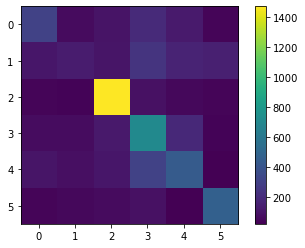

In [15]:
plt.imshow(confusion_matrix(y_test, pred))
plt.colorbar()

### Get the recall 

In [12]:
from sklearn.metrics import recall_score
recall_score(y_test, pred, average=None)

array([0.36623068, 0.14679912, 0.84606548, 0.59299416, 0.40930233,
       0.63414634])

### Get Precision

In [13]:
from sklearn.metrics import precision_score
precision_score(y_test, pred, average=None)

array([0.4562963 , 0.2988764 , 0.74809548, 0.43512852, 0.43868395,
       0.60465116])

### F1 score

In [14]:
from sklearn.metrics import f1_score
f1_score(y_test, pred, average=None)

array([0.40633245, 0.19689119, 0.79407008, 0.5019414 , 0.42348412,
       0.61904762])